In [1]:
import augmentation
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image as pilimg
import time
import cv2


gray = np.array(pilimg.open('img_Testes2.tiff').convert('L'),dtype=np.uint8)#imagem normal
img_bin = np.array(pilimg.open('img_Testes2.png').convert('L'),dtype=np.uint8)#imagem binaria (label)
# print(idxpc)
plt.figure(figsize=(8,8))
plt.imshow(img_bin, 'gray')
plt.title('Imagem 1')

img_bin = (img_bin>1)*255


img_bin = (img_bin).astype(np.uint8) #imagem binaria (label)



proto_graph = augmentation.createGraph(img_bin,True) #cria o grafo
tamanhoVasos,vlr_min, vlr_max = augmentation.extract_full_lenght(proto_graph)
media = np.mean(tamanhoVasos)
print('Tamanho minimo de vaso')
print(vlr_min)
print('Tamanho maximo de vaso')
print(vlr_max)
print('Tamanho medio de vaso')
print(media)

img_graph = augmentation.util.graph_to_img(proto_graph, img_bin.shape, node_pixels_color=(128, 128, 128),
                                  edge_color=(255, 255, 255)) # criar imagem do grafo

proto_graph

%matplotlib widget
# plt.figure(figsize=(10,10))
# # plt.subplot(1, 3, 1)
# plt.imshow(img_graph, 'gray')


rqi_len_param_interv=[30,80] #intervalo de tamanho para o tamanho da região de queda 
min_len_interv=[15,30] #intervalo de tamanho do valor minimo da queda
n_rqi_interv=[5,10] #intervalo de quantidades de vasos modificados
median_threshold = 1 #valor da media para que a area de fundo seja aceita como substituição da area minima

img_new, debug_full = augmentation.create_image(rqi_len_param_interv = rqi_len_param_interv, 
                                                min_len_interv=min_len_interv, 
                                                n_rqi_interv=n_rqi_interv,
                                                graph=proto_graph,
                                                img_label = img_bin,
                                                img_origin = gray,
                                                median_threshold = median_threshold,
                                                rnd_seed=0,
                                                highlight_center=True)

# oriCrop, lblCrop, newCrop, newCropDyn, img_seg_crop, rqi_int_plot, vessel_int_plot, vessel_int_new, obj_cords, idxpc, idxp1, idxp2, idxpp1, idxpp2, debug_expand,newCrop_mod = debug

# # print(idxpc)
# img_print = oriCrop
# pc=((img_print.shape[0]-1)//2, (img_print.shape[1]-1)//2)
# img_print = cv2.merge((img_print, img_print, img_print))





Could not load skeleton library. Unable to calculate skeletons.
Tamanho minimo de vaso
0.0
Tamanho maximo de vaso
99.50376877284599
Tamanho medio de vaso
14.35304780270989
Unable to find a valid background for RQI
Unable to find a valid background for RQI
Unable to find a valid background for RQI
Unable to find a valid background for RQI
Unable to find a valid background for RQI


Text(0.5, 1.0, 'Imagem final')

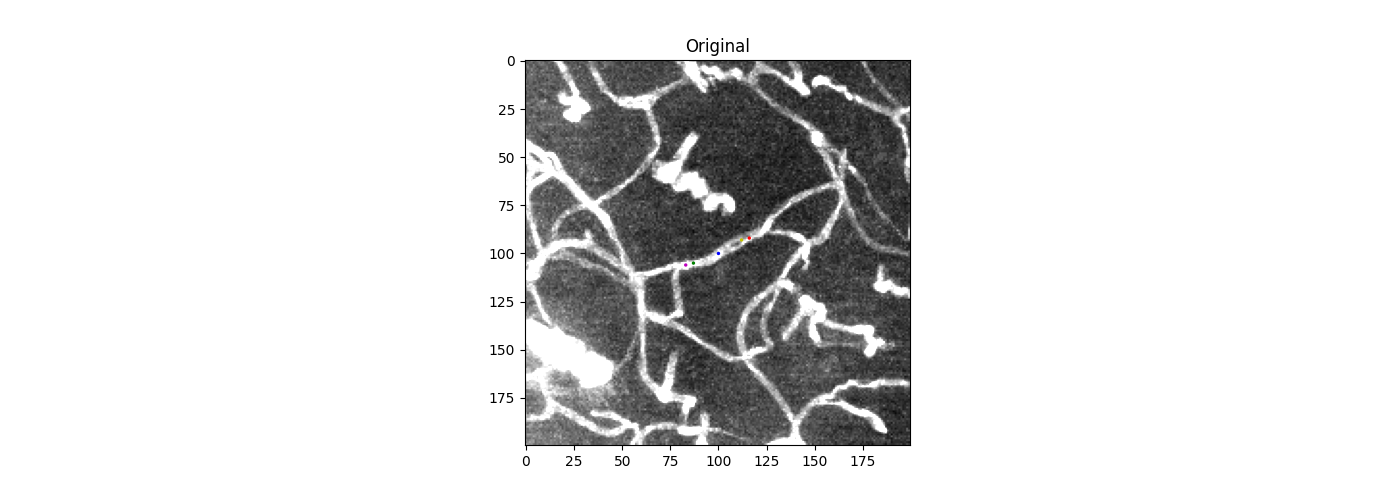

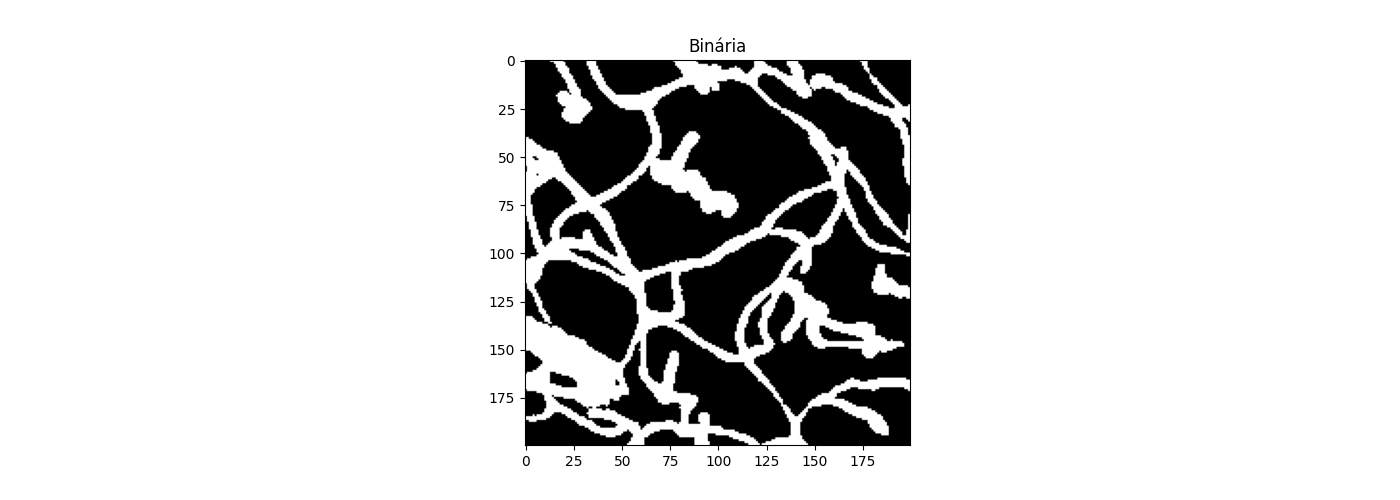

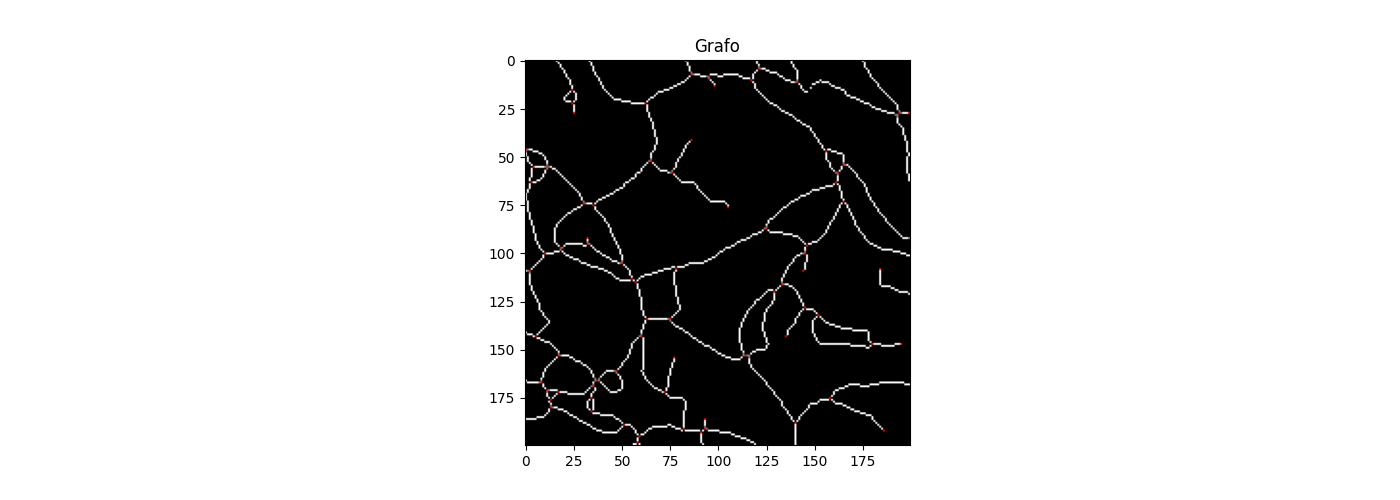

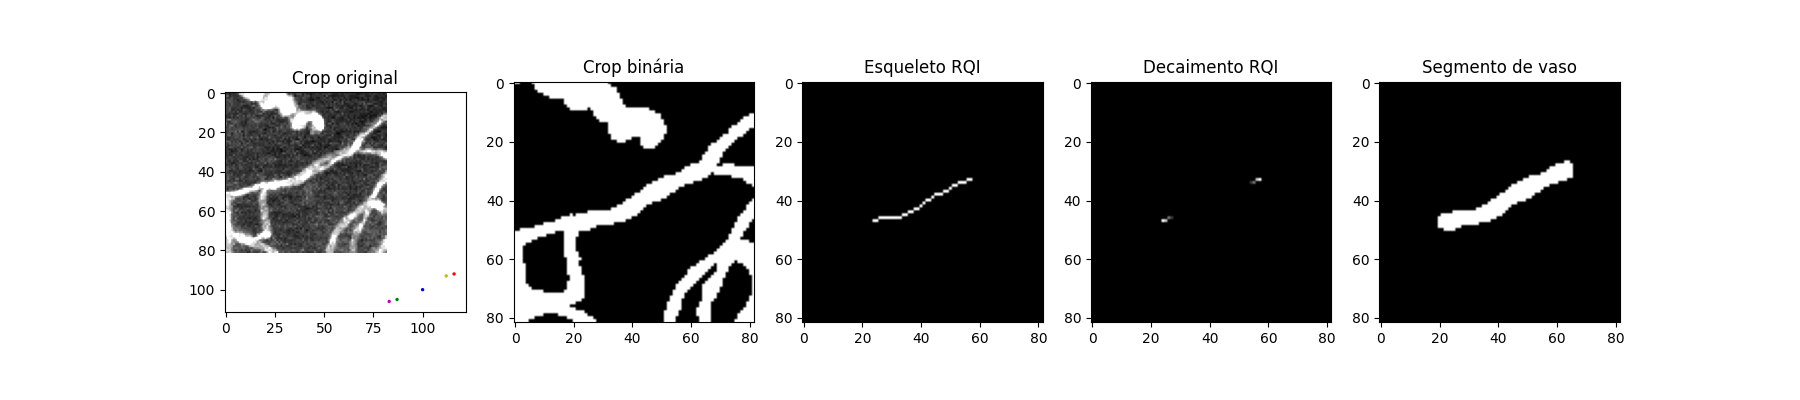

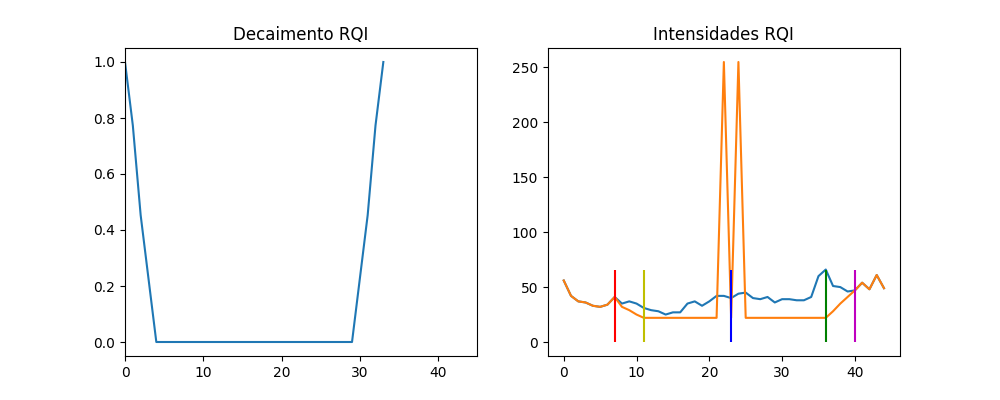

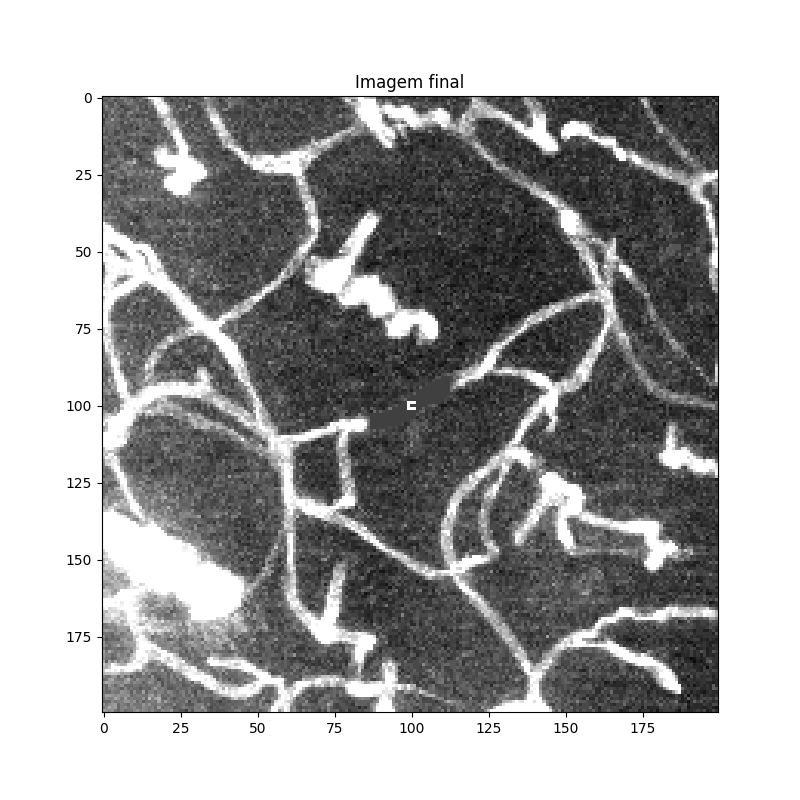

In [2]:
# oriCrop, lblCrop, newCrop, newCropDyn, img_seg_crop, rqi_int_plot, vessel_int_plot, vessel_int_new, obj_cords, idxpc, idxp1, idxp2, idxpp1, idxpp2, debug_expand = debugger[0]
# img_exp, img_ret_loc, outPutConv, img_only_back, coordsLoc, coordsLocNew, contorno = debug_expand

oriCrop, lblCrop, newCrop, newCropDyn, img_seg_crop, rqi_int_plot, vessel_int_plot, vessel_int_new, obj_cords, idxpc, idxp1, idxp2, idxpp1, idxpp2, debug_expand,newCrop_mod   = debug_full[2]

img_exp, img_ret_loc, outPutConv, img_only_back, coordsLoc, coordsLocNew, contorno = debug_expand


rqi_len_param = 100
inds = [idxp1, idxpp1, idxpc, idxpp2, idxp2]
p_row = [obj_cords[idx][0] for idx in inds]
p_col = [obj_cords[idx][1] for idx in inds]
pc = (p_row[2], p_col[2])
min_r = max([0, pc[0]-rqi_len_param])
min_c = max([0, pc[1]-rqi_len_param])
region = (slice(min_r, pc[0]+rqi_len_param), 
          slice(min_c, pc[1]+rqi_len_param))
p_row_slice = [p-min_r for p in p_row]
p_col_slice = [p-min_c for p in p_col]

plt.figure(figsize=(14,5))
# plt.subplot(1, 3, 1)
plt.imshow(gray[region], 'gray', vmax=40)
plt.scatter(p_col_slice, p_row_slice, s=2, c=['r', 'y', 'b', 'g', 'm'])
plt.title('Original')
plt.figure(figsize=(14,5))
# plt.subplot(1, 3, 2)
plt.imshow(img_bin[region], 'gray')
plt.title('Binária')
plt.figure(figsize=(14,5))
# plt.subplot(1, 3, 3)
plt.imshow(img_graph[region], 'gray')
plt.title('Grafo')

plt.figure(figsize=(18,4))
plt.subplot(1, 5, 1)
plt.imshow(oriCrop, 'gray', vmax=40)
plt.scatter(p_col_slice, p_row_slice, s=2, c=['r', 'y', 'b', 'g', 'm'])
plt.title('Crop original')
plt.subplot(1, 5, 2)
plt.imshow(lblCrop, 'gray')
plt.title('Crop binária')
plt.subplot(1, 5, 3)
plt.imshow(newCrop, 'gray')
plt.title('Esqueleto RQI')
plt.subplot(1, 5, 4)
plt.imshow(newCropDyn, 'gray')
plt.title('Decaimento RQI')
plt.subplot(1, 5, 5)
plt.imshow(img_seg_crop, 'gray')
plt.title('Segmento de vaso')

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(rqi_int_plot)
plt.xlim((0,len(vessel_int_plot)))
plt.title('Decaimento RQI')
plt.subplot(1, 2, 2)
plt.plot(vessel_int_plot)
plt.plot(vessel_int_new)
plt.vlines([idxp1, idxpp1, idxpc, idxpp2, idxp2], ymin=0, ymax=max(vessel_int_plot), colors=['r', 'y', 'b', 'g', 'm'])
plt.title('Intensidades RQI')

# View final result
plt.figure(figsize=(8,8))
plt.imshow(img_new[region], 'gray', vmax=40)
plt.title('Imagem final')


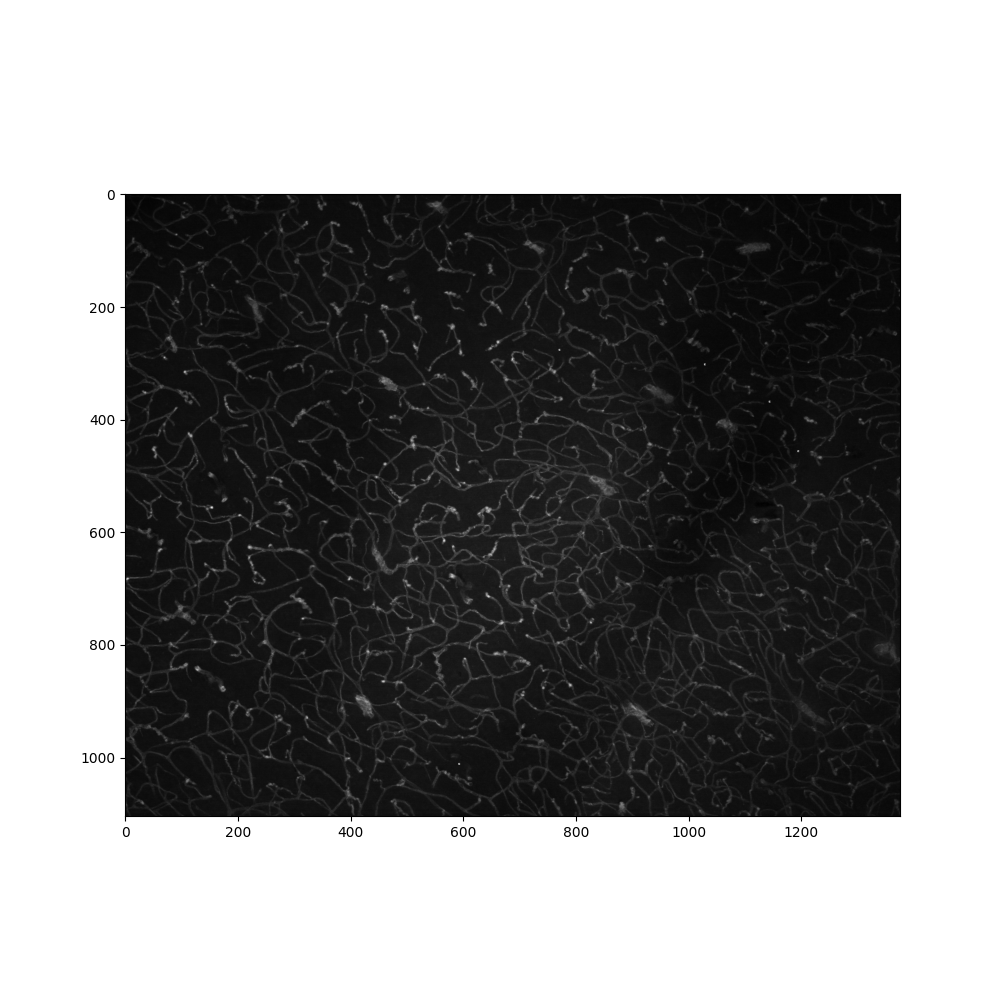

In [3]:

%matplotlib widget
plt.figure(figsize=(10,10))
# plt.subplot(1, 3, 1)
plt.imshow(img_new, 'gray')